In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Exploration and Preprocessing:

In [3]:
## Load the dataset 
data = pd.read_csv('adult_with_headers.csv')
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Basic EDA

In [4]:
data.shape

(32561, 15)

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [10]:
data.corr(numeric_only = True)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


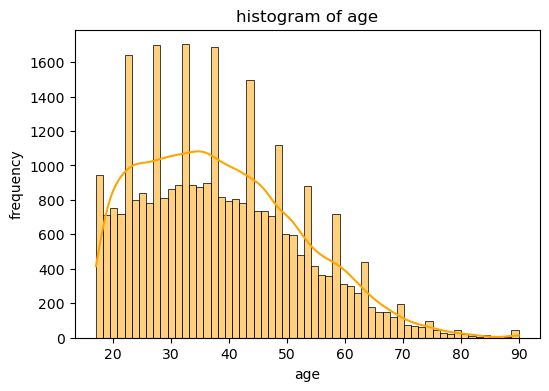

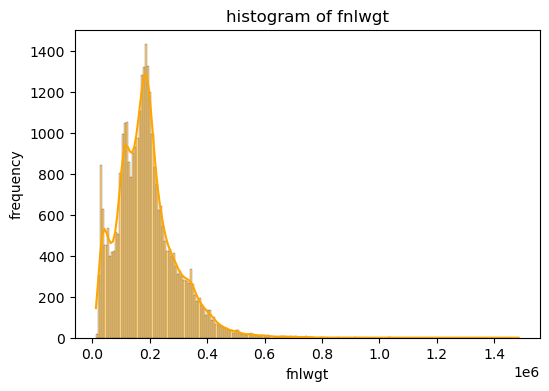

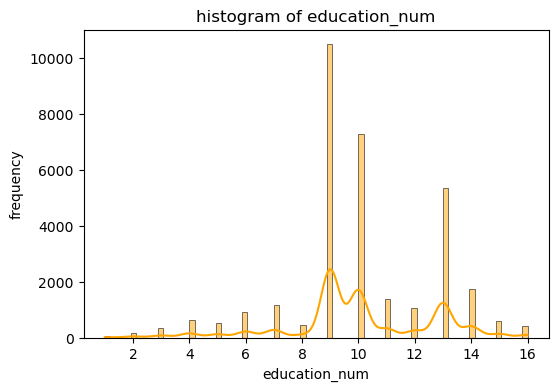

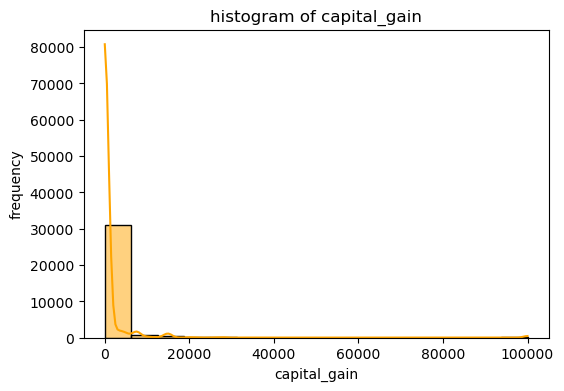

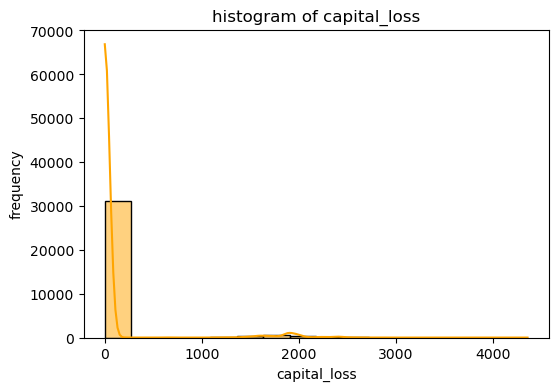

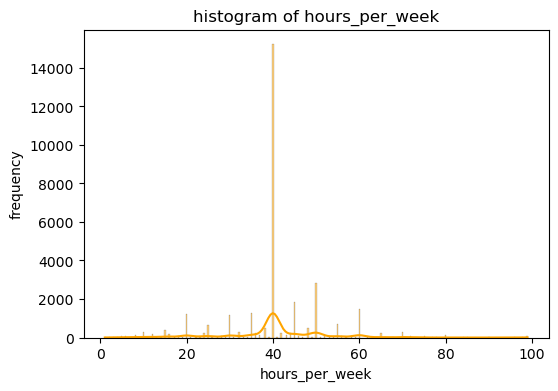

In [13]:
#creating histogram
data_numeric = data._get_numeric_data()
for col in data_numeric.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data_numeric[col],kde=True,color='orange',edgecolor='black')
    plt.title(f'histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

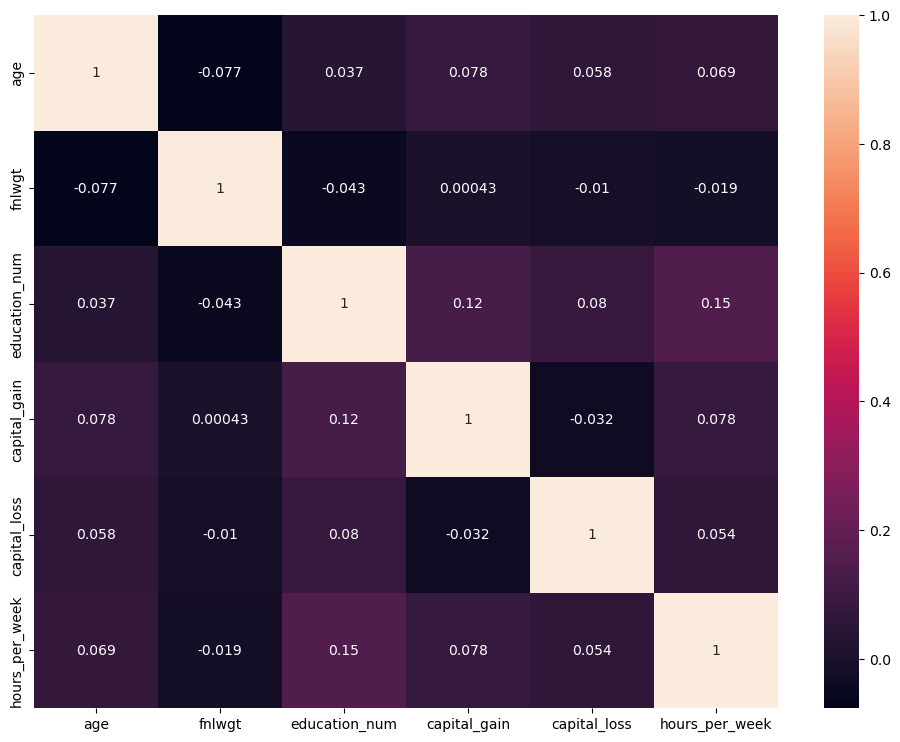

In [14]:
#correlation heatmap

plt.figure(figsize=(12,9))
sns.heatmap(data.corr(numeric_only = True),annot=True)
plt.show()

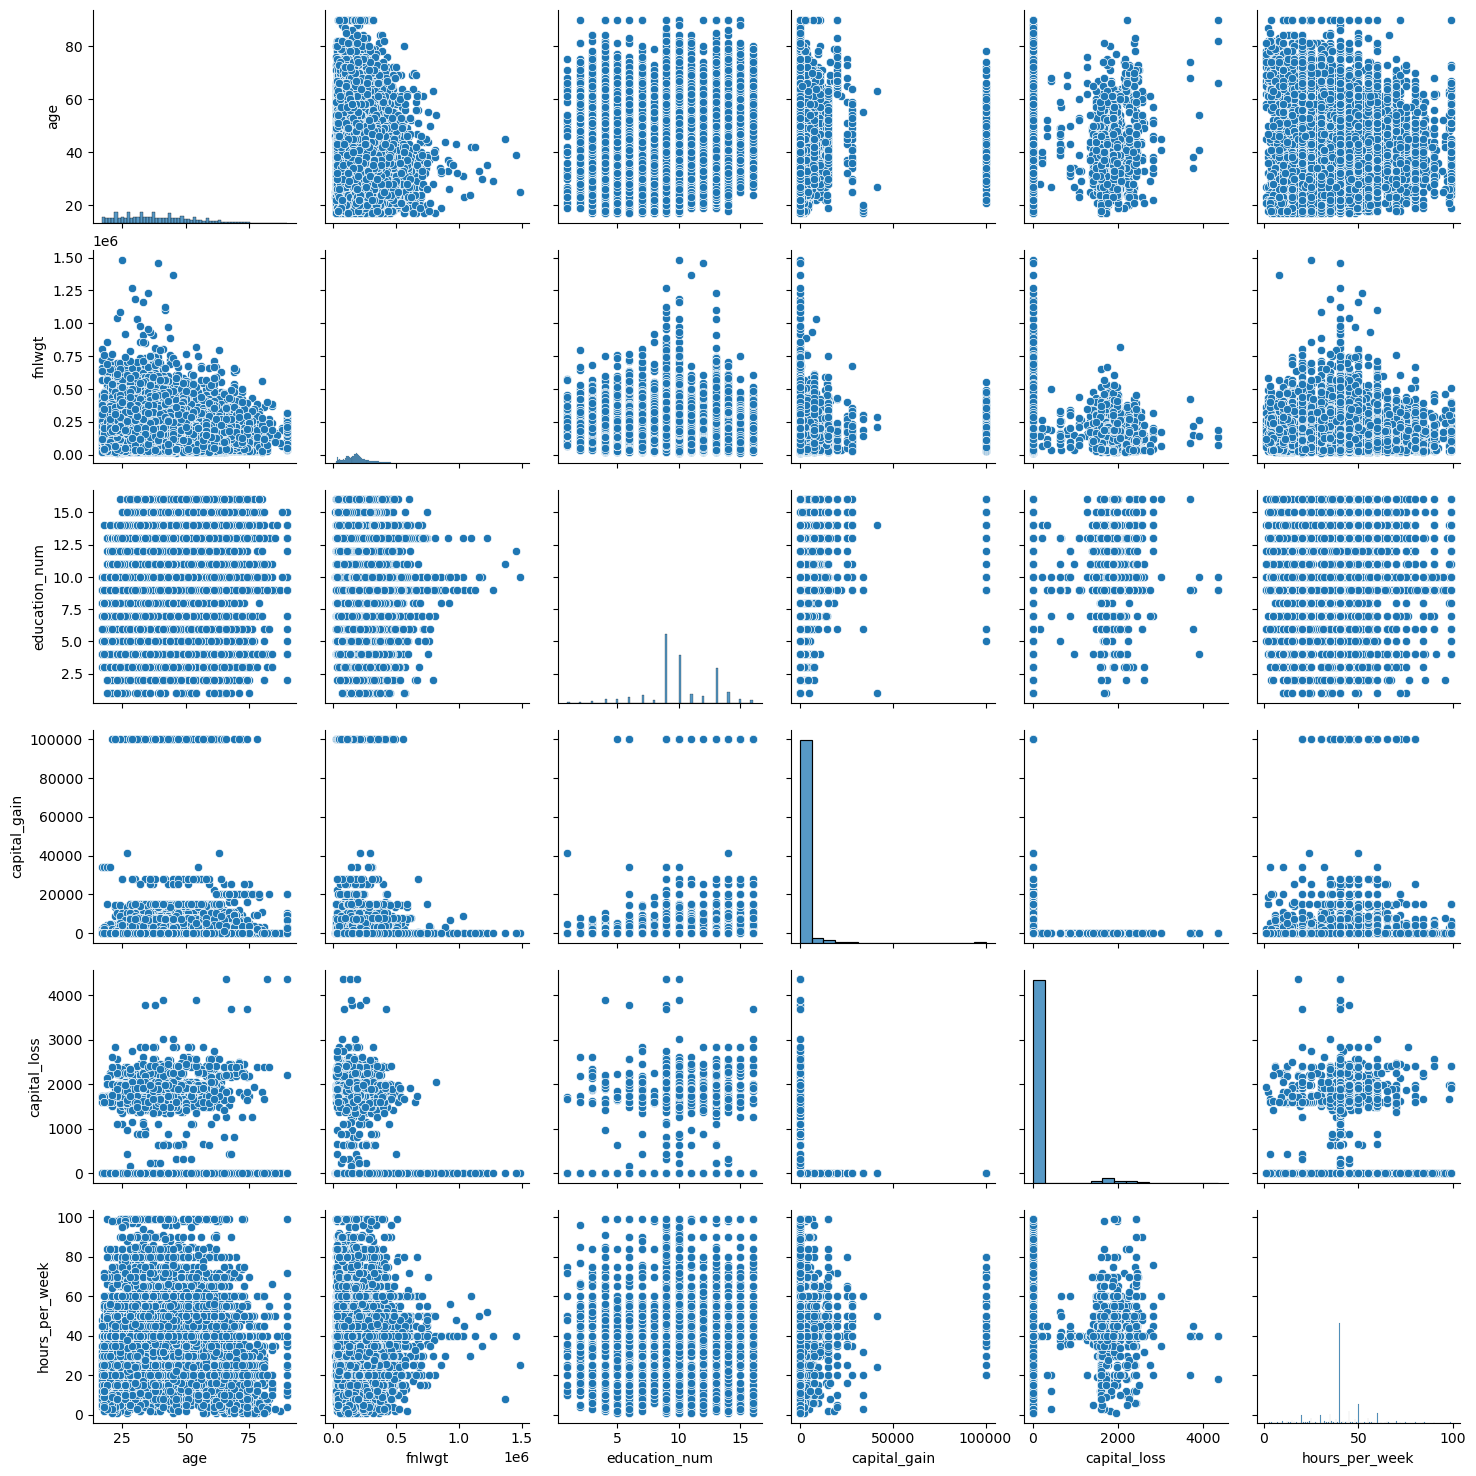

In [15]:
#pairplot

sns.pairplot(data_numeric)
plt.show()

## Scaling techniques to numerical features

In [16]:
num_data = data._get_numeric_data()
num_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## Standard scaling :
### Transform features so that they have mean = 0 and standard deviation = 1 
### Useful algorithm that assume normal distributed data (eg: linear regression, SVM etc...)
## Min-Max scaling :
### Scales data to a fixed range typically(0,1)
### Useful when features have different ranges

## Standard Scaling:

In [18]:
model1 = StandardScaler()
ss_scaler = model1.fit_transform(num_data)
ss_scaler

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

## Min-Max Scaling:

In [19]:
model2 = MinMaxScaler()
mm_scaler = model2.fit_transform(num_data)
mm_scaler

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

##  2. Encoding Techniques:

In [20]:
cat_data = data.select_dtypes(include=['object']).columns
cat_data

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

## Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [21]:
data = pd.get_dummies(data,columns=['race','sex'])
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K,False,False,False,False,True,False,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K,False,False,False,False,True,False,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K,False,False,False,False,True,False,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K,False,False,True,False,False,False,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K,False,False,False,False,True,True,False
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K,False,False,False,False,True,False,True
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K,False,False,False,False,True,True,False
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,20,United-States,<=50K,False,False,False,False,True,False,True


## Use Label Encoding for categorical variables with more than 5 categories.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
data['workclass'] =le.fit_transform(data['workclass']) 
data['education'] =le.fit_transform(data['education']) 
data['marital_status'] =le.fit_transform(data['marital_status'])
data['occupation'] =le.fit_transform(data['occupation']) 
data['relationship'] =le.fit_transform(data['relationship']) 
data['native_country'] =le.fit_transform(data['native_country']) 
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,7,77516,9,13,4,1,1,2174,0,40,39,<=50K,False,False,False,False,True,False,True
1,50,6,83311,9,13,2,4,0,0,0,13,39,<=50K,False,False,False,False,True,False,True
2,38,4,215646,11,9,0,6,1,0,0,40,39,<=50K,False,False,False,False,True,False,True
3,53,4,234721,1,7,2,6,0,0,0,40,39,<=50K,False,False,True,False,False,False,True
4,28,4,338409,9,13,2,10,5,0,0,40,5,<=50K,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,38,39,<=50K,False,False,False,False,True,True,False
32557,40,4,154374,11,9,2,7,0,0,0,40,39,>50K,False,False,False,False,True,False,True
32558,58,4,151910,11,9,6,1,4,0,0,40,39,<=50K,False,False,False,False,True,True,False
32559,22,4,201490,11,9,4,1,3,0,0,20,39,<=50K,False,False,False,False,True,False,True


# The pros and cons of One-Hot Encoding and Label Encoding

## One-hot encoding :
### It convert into new binary columns means multiple columns
### It increase memory Ram and it prints only TRUE and FALSE resprestively
## Label-encoding :
### It convert into categorical into numerical values and increase execution speed easily understand
### Optimize memory space to print one column only

# 3. Feature Engineering:

### Feature 1 : capital_net
#### Combines both capital_gain and captal_loss into a single measure of net capital income
### High positive capital_net correlate with higher income (>50K)

In [26]:
data['capital_net'] = data['capital_gain'] - data['capital_loss']
data['capital_net']

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_net, Length: 32561, dtype: int64

In [27]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,capital_net
0,39,7,77516,9,13,4,1,1,2174,0,...,39,<=50K,False,False,False,False,True,False,True,2174
1,50,6,83311,9,13,2,4,0,0,0,...,39,<=50K,False,False,False,False,True,False,True,0
2,38,4,215646,11,9,0,6,1,0,0,...,39,<=50K,False,False,False,False,True,False,True,0
3,53,4,234721,1,7,2,6,0,0,0,...,39,<=50K,False,False,True,False,False,False,True,0
4,28,4,338409,9,13,2,10,5,0,0,...,5,<=50K,False,False,True,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,...,39,<=50K,False,False,False,False,True,True,False,0
32557,40,4,154374,11,9,2,7,0,0,0,...,39,>50K,False,False,False,False,True,False,True,0
32558,58,4,151910,11,9,6,1,4,0,0,...,39,<=50K,False,False,False,False,True,True,False,0
32559,22,4,201490,11,9,4,1,3,0,0,...,39,<=50K,False,False,False,False,True,False,True,0


## Check the skewness of numerical features

In [29]:
num_data = ['age', 'fnlwgt','education_num', 'capital_gain','capital_loss', 'hours_per_week', 'capital_net']

In [30]:
skewness = data[num_data].skew().sort_values(ascending=False)
skewness

capital_gain      11.953848
capital_net       11.871934
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64

### We find that capital_gain is highly skewed (11.953848) since most people have 0, but a few have large gains

## Apply a transformation 

In [31]:
data['log_capital_gain'] = np.log1p(data['capital_gain'])
data['log_capital_gain']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: log_capital_gain, Length: 32561, dtype: float64

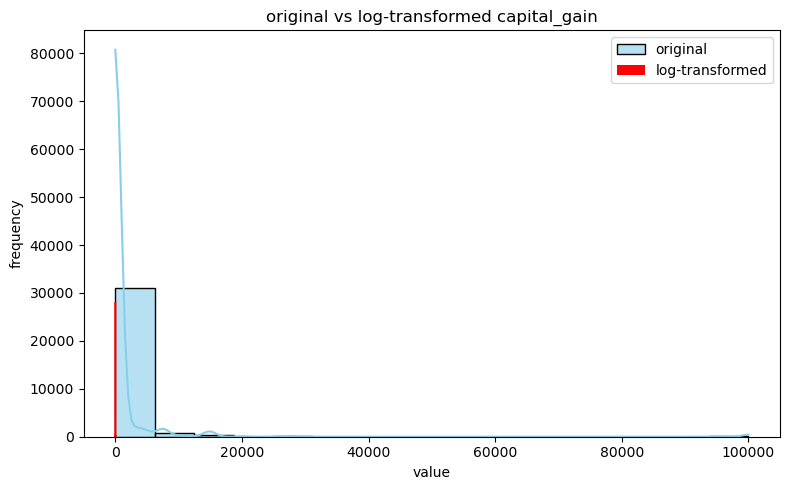

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(data['capital_gain'],kde=True,color='skyblue',label='original',alpha=0.6)
sns.histplot(data['log_capital_gain'],kde=True,color='red',label='log-transformed',alpha=1)
plt.title('original vs log-transformed capital_gain')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Feature Selection:

### The isolation forest algorithm detects anomalies by isolating data points that differ significantly from the rest

In [35]:
from sklearn.ensemble import IsolationForest

In [36]:
num_data = ['age', 'fnlwgt','education_num', 'capital_gain','capital_loss', 'hours_per_week']

In [37]:
iso = IsolationForest(contamination=0.02,random_state=42)
outliers = iso.fit_predict(data[num_data])
data['outlier_flag'] = outliers

In [38]:
data_no_outliers = data[data['outlier_flag'] == 1].drop(columns=['outlier_flag'])

In [39]:
print('original shape : ',data.shape)
print('after removing outliers : ',data_no_outliers.shape)

original shape :  (32561, 23)
after removing outliers :  (31909, 22)


### Outliers can distort the data distribution and bias model training, leading to poor generalization and inaccurate predictions
### Removing them ensures cleaner data,improves model stability, and enhances overall accuracy.

## Apply the PPS (Predictive Power Score) 

In [40]:
pip install ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2527 lines of output]
  <string>:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  C:\Users\HP\AppData\Local\Temp\pip-build-env-36gs6xk_\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: BSD License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_ex

In [41]:
import ppscore as pps

ModuleNotFoundError: No module named 'ppscore'

In [42]:
pps_matrix = pps.matrix(data_no_outliers)

NameError: name 'pps' is not defined

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(pps_matrix.pivot(columns='x',index='y',values='ppscore'),cmap='YlGnBu',annot=True)
plt.title('predictive power score(PPS) matrix')
plt.show()

## Compare its findings with the correlation matrix.

In [43]:
corr_matrix = data_no_outliers.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)
plt.title('correlation matrix')
plt.show()

ValueError: could not convert string to float: ' <=50K'